In [1]:
import numpy as np

from Packomania import Packomania
from DE import DifferentialEvolution
from benchmark import results2np, get_popsize, benchmark
from utils import *

from time import time
from random import seed

In [3]:

def benchmark_variance(
        differential_weight, 
        crossover_prob,
        max_evaluations,
        optimum_accuracy,
        get_popsize_func,
        num_points_list,
        rng_seed=0
    ):
    start_time = time()
    seed(rng_seed)
    results = []
    for num_points in num_points_list:
        print(f"Num points: {num_points}")
        dim = num_points*2
        
        popsize = get_popsize_func(dim)
        bounds = get_stricter_bounds(num_points)
        pk = Packomania(num_points)
        optimum = pk.distance
        
        de = DifferentialEvolution(
            scattering_points,
            bounds,
            popsize,
            differential_weight,
            crossover_prob
        )
        de.set_optimum(optimum, optimum_accuracy)
        r = benchmark_variance_run(de)
        results.append(r)
    return results
        
#         de_set_optimum(optimum, optimum_accuracy)
        
        
    
def benchmark_variance_run(algo,
                            max_evaluations=5e6,
                            num_runs=10,
                            verbose=True):
        results = dict()
        results['iter_evaluations'] = []
        results['iter_variance'] = []
        results['exitflag'] = []
        results['optimum'] = []

        for i in range(1, num_runs+1):
            print(f"RUN #{i}")
            max_eval_variable = max_evaluations
            evaluations = 0
            start_time = time()
            
            algo.reset()
            algo.run(crossover='best_points3', max_evaluations=max_evaluations,
                     verbose=False)
            
            results['iter_evaluations'].append(algo.iter_evals)
            results['iter_variance'].append(algo.iter_var_obj_val)
            results['exitflag'].append(algo.exitflag)
            results['optimum'].append(algo.found_optimum)
           
            print(f"\tRUN DURATION: {time()-start_time}s")
        return results
    
    



In [4]:
num_points_list=[6,7,9]
get_popsize_func_A3 = lambda popsize: get_popsize(popsize, m=15)

results_A3 = benchmark_variance(differential_weight=0.3,
                       crossover_prob=0.99,
                       max_evaluations=5e6,
                       get_popsize_func=get_popsize_func_A3,
                       num_points_list=num_points_list,
                       optimum_accuracy=1e-3)

Num points: 6
RUN #1
Optimum reached
	RUN DURATION: 1.7453198432922363s
RUN #2
Optimum reached
	RUN DURATION: 1.7034432888031006s
RUN #3
Optimum reached
	RUN DURATION: 1.4092302322387695s
RUN #4
Optimum reached
	RUN DURATION: 0.7679464817047119s
RUN #5
Optimum reached
	RUN DURATION: 1.4930050373077393s
RUN #6
Optimum reached
	RUN DURATION: 1.19580078125s
RUN #7
Optimum reached
	RUN DURATION: 3.0388708114624023s
RUN #8
Optimum reached
	RUN DURATION: 1.0771186351776123s
RUN #9
Optimum reached
	RUN DURATION: 2.3955910205841064s
RUN #10
Optimum reached
	RUN DURATION: 1.9767112731933594s
Num points: 7
RUN #1
Maximum number of evaluations
	RUN DURATION: 226.87406635284424s
RUN #2
Maximum number of evaluations
	RUN DURATION: 227.38968753814697s
RUN #3
Maximum number of evaluations
	RUN DURATION: 227.05059432983398s
RUN #4
Maximum number of evaluations
	RUN DURATION: 227.39567112922668s
RUN #5
Maximum number of evaluations
	RUN DURATION: 227.33982062339783s
RUN #6
Maximum number of evaluations

In [5]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


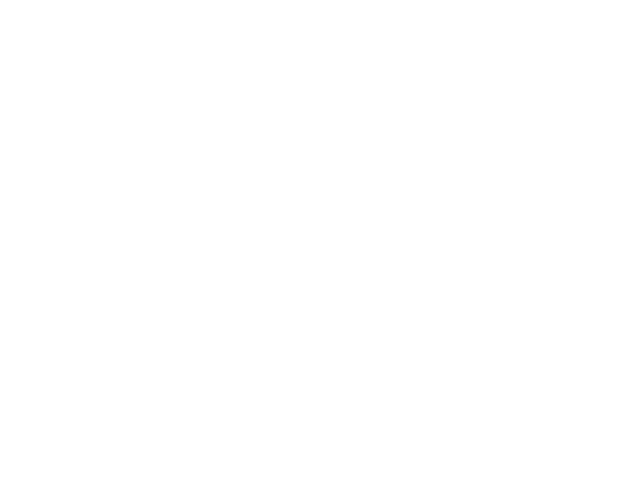

In [6]:
# r_np_6 = results_A3[0]
%matplotlib notebook
for r in results_A3:
    for i in range(len(r['iter_evaluations'])):
        if r['optimum'][i]:
            plt.loglog(r['iter_evaluations'][i], r['iter_variance'][i], 'b')
        else:
            plt.loglog(r['iter_evaluations'][i], r['iter_variance'][i], 'r')

plt.xlabel('Evaluations')
plt.ylabel('Population objective value variance')
plt.savefig('NBB_restart_A3_v2.pdf')

In [7]:
num_points_list=[6,7,9]
get_popsize_func_6 = lambda popsize: get_popsize(popsize, m=20)


results_A6 = benchmark_variance(differential_weight=0.1,
                       crossover_prob=0.99,
                       max_evaluations=5e6,
                       get_popsize_func=get_popsize_func_6,
                       num_points_list=num_points_list,
                       optimum_accuracy=1e-6)

Num points: 6
RUN #1
Optimum reached
	RUN DURATION: 2.7446582317352295s
RUN #2
Maximum number of evaluations
	RUN DURATION: 190.43953585624695s
RUN #3
Optimum reached
	RUN DURATION: 3.20442795753479s
RUN #4
Population converged
	RUN DURATION: 4.475027799606323s
RUN #5
Maximum number of evaluations
	RUN DURATION: 192.27362990379333s
RUN #6
Maximum number of evaluations
	RUN DURATION: 190.38567662239075s
RUN #7
Optimum reached
	RUN DURATION: 2.7356817722320557s
RUN #8
Population converged
	RUN DURATION: 10.486944437026978s
RUN #9
Population converged
	RUN DURATION: 4.522900819778442s
RUN #10
Maximum number of evaluations
	RUN DURATION: 190.90329575538635s
Num points: 7
RUN #1
Maximum number of evaluations
	RUN DURATION: 230.4215760231018s
RUN #2
Maximum number of evaluations
	RUN DURATION: 235.24567127227783s
RUN #3
Population converged
	RUN DURATION: 6.891563415527344s
RUN #4
Population converged
	RUN DURATION: 5.778541326522827s
RUN #5
Maximum number of evaluations
	RUN DURATION: 232.9

<IPython.core.display.Javascript object>


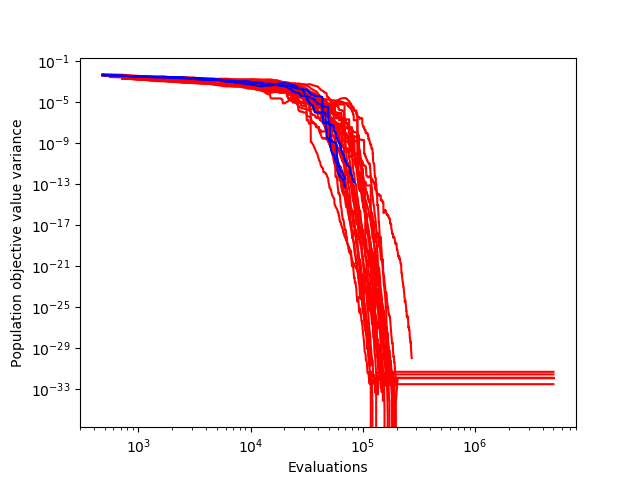

In [8]:
%matplotlib notebook
for r in results_A6:
    for i in range(len(r['iter_evaluations'])):
        if not r['optimum'][i]:
            plt.loglog(r['iter_evaluations'][i], r['iter_variance'][i], 'r')
    
for r in results_A6:
    for i in range(len(r['iter_evaluations'])):
        if r['optimum'][i]:
            plt.loglog(r['iter_evaluations'][i], r['iter_variance'][i], 'b')

plt.xlabel('Evaluations')
plt.ylabel('Population objective value variance')
plt.savefig('NBB_restart_A6_v2.pdf')